# PREDICTION OF DODGECOIN PRICE MOVEMENT USING MACHINE LEARNING
### This project focuses on developing a Dogecoin price movement prediction system using machine learning techniques. Although cryptocurrencies like Bitcoin and Ethereum dominate the market, Dogecoin  inspired by the “doge” meme  has gained popularity through online communities and celebrity endorsements. Despite the volatility of cryptocurrencies and unclear regulations in India, their features such as fast transfers, anonymity, and low transaction costs have driven adoption. The project aims to use historical Dogecoin data and market indicators to train a model capable of predicting future price movements.


## Library Section

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Laoding

In [2]:
dataset = pd.read_csv("DOGE-USD.csv")

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [5]:
dataset.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
1755,2022-08-30,0.063899,0.064408,0.060550,0.061525,0.061525,328934727.0
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0


##  Data Featuring & Visualizing Time Series Trend

### Plot Closing Price Overtime
#### The closing price represents the final price at which Dogecoin was traded on each day.It helps visualize the overall price movement and detect long-term upward or downward trends.The closing price is often used as the target variable in prediction models. By studying its trend, the model learns how historical price patterns influence future values.

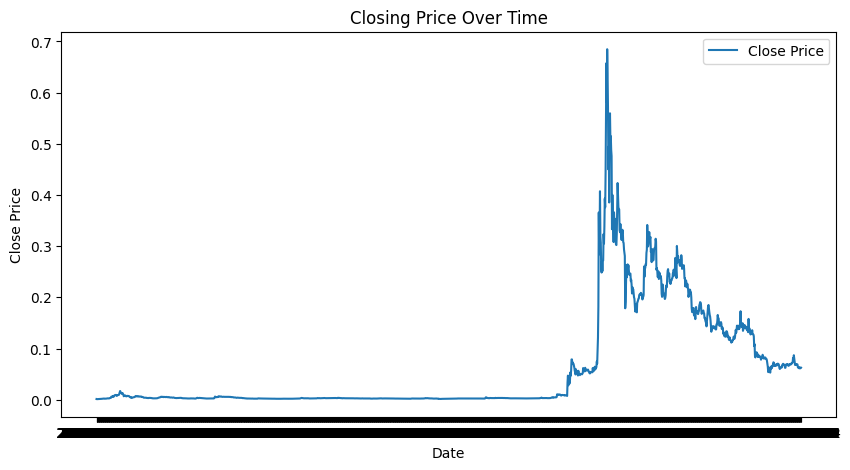

In [8]:
plt.figure(figsize=(10,5))
plt.plot(dataset['Date'],dataset['Close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Daily Return Over Time
#### Daily return measures the percentage change in closing price from one day to the next.It highlights volatility how much the price fluctuates daily.Understanding daily returns helps in predicting price direction (up/down movement) rather than just absolute price. It can also help identify periods of high market activity or risk.


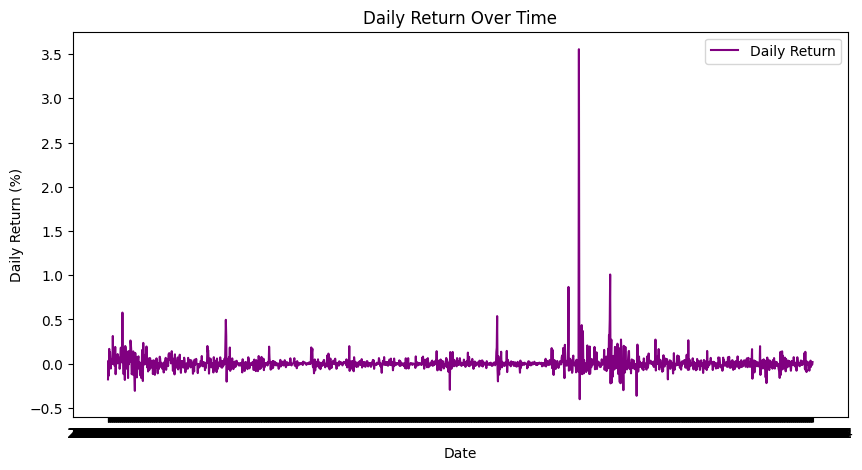

In [9]:
dataset['Daily Return'] = dataset['Close'].pct_change()   # Calculate daily percentage change

plt.figure(figsize=(10,5))
plt.plot(dataset['Date'], dataset['Daily Return'], label='Daily Return', color='purple')
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()

### Return Distribution
#### A histogram showing how frequently certain daily return values occur (positive or negative).It reveals whether returns are normally distributed, skewed, or have heavy tails, which indicates market volatility and stability.The model can use this to understand the probability of large price changes. A wider distribution means more unpredictable movement, which informs model selection and risk estimation.

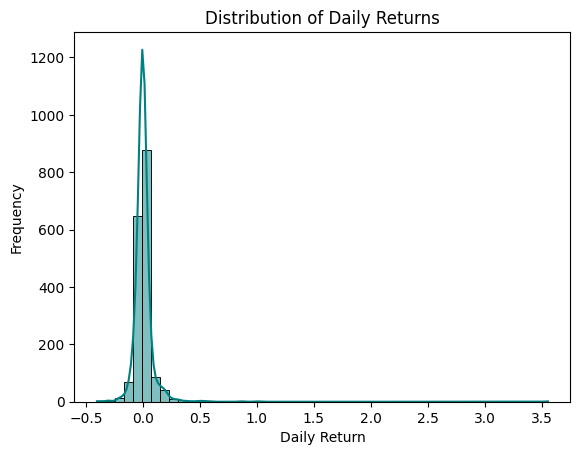

In [10]:
sns.histplot(dataset['Daily Return'].dropna(), bins=50, kde=True, color='teal')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

### Moving Averages
#### A moving average (MA) smooths out price data by averaging it over a fixed window (e.g., 20 or 50 days).It helps identify trends and potential turning points in the price. The 20day MA captures short-term trends, while the 50-day MA represents medium-term movement.Moving averages are strong trend indicators that help the model understand momentum whether the market is trending up, down, or stabilizing.

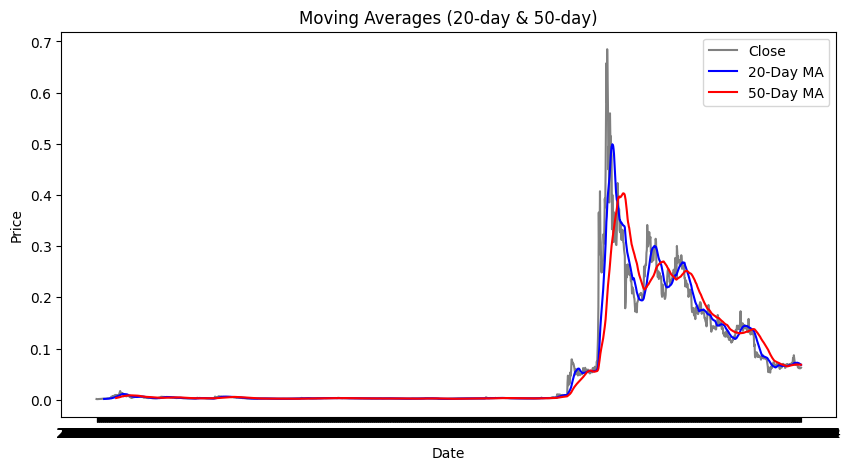

In [11]:
dataset['MA20'] = dataset['Close'].rolling(20).mean()   # 20-day moving average
dataset['MA50'] = dataset['Close'].rolling(50).mean()   # 50-day moving average

plt.figure(figsize=(10,5))
plt.plot(dataset['Date'], dataset['Close'], label='Close', color='gray')
plt.plot(dataset['Date'], dataset['MA20'], label='20-Day MA', color='blue')
plt.plot(dataset['Date'], dataset['MA50'], label='50-Day MA', color='red')
plt.title('Moving Averages (20-day & 50-day)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA20,MA50
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0,NaN,NaN,NaN
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0,-0.178092,NaN,NaN
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0,0.032674,NaN,NaN
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0,-0.135720,NaN,NaN
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0,0.166667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1755,2022-08-30,0.063899,0.064408,0.060550,0.061525,0.061525,328934727.0,-0.036972,0.070612,0.068437
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0,-0.003169,0.070132,0.068461
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0,0.016990,0.069634,0.068470
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0,-0.011816,0.069073,0.068455
